In [ ]:
pip install ydata-profiling

                                     Title                      Salary  \
0                Order Fulfillment Manager  PKR. 30,000 - 60,000/Month   
1  Enterprise Business Development Manager                         NaN   
2                             Video Editor  PKR. 30,000 - 30,000/Month   
3               Branch in Charge (Patokki)  PKR. 60,000 - 60,000/Month   
4                     Senior PHP Developer                         NaN   

              Job Type                                       Job Location  \
0  Full Time/Permanent  Lahore,\n                                     ...   
1  Full Time/Permanent  Lahore,\n                                     ...   
2  Full Time/Permanent  Karachi,\n                                    ...   
3  Full Time/Permanent  Patoki,\n                                     ...   
4  Full Time/Permanent  Lahore,\n                                     ...   

  Functional Area              Career Level Apply Before Minimum Experience  \
0          Re

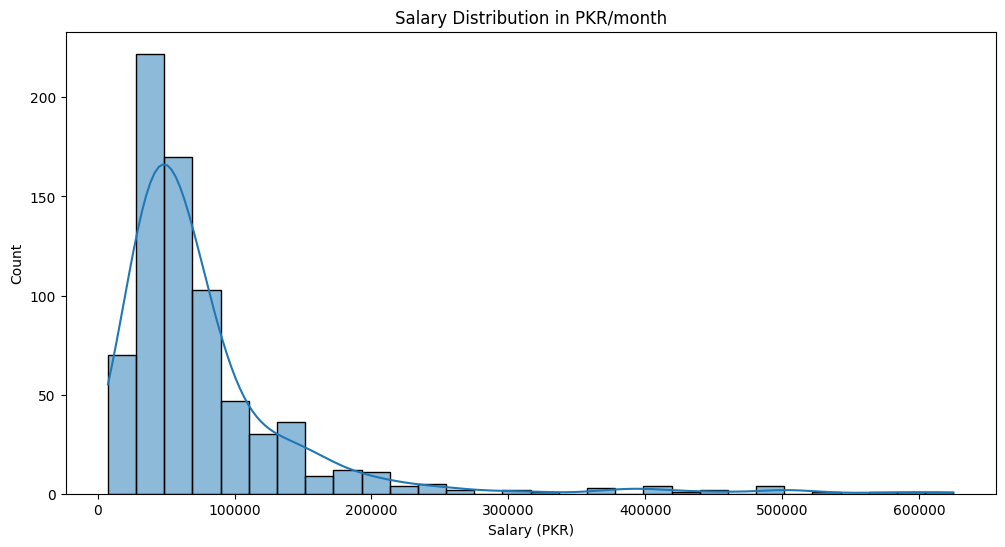

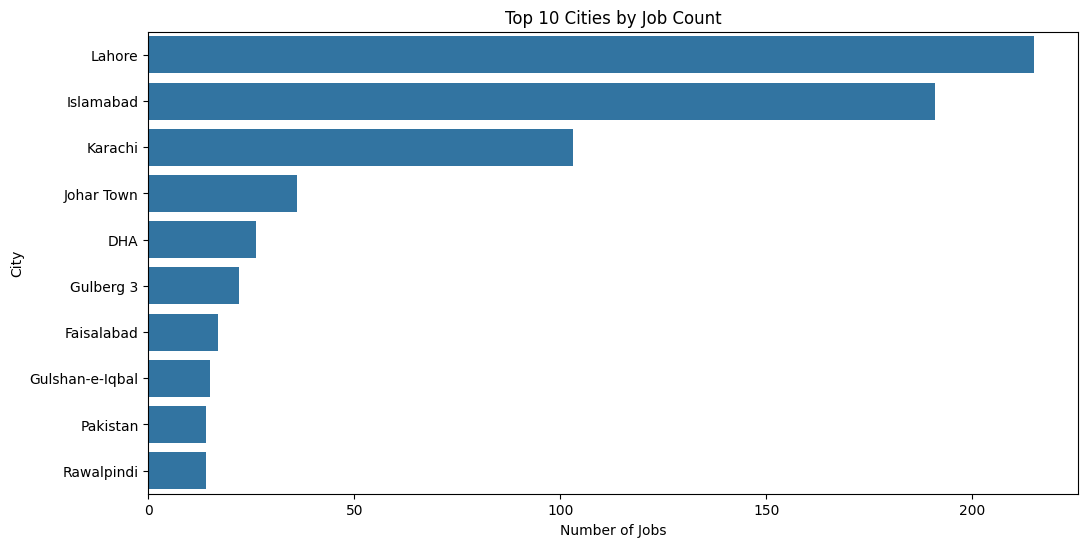

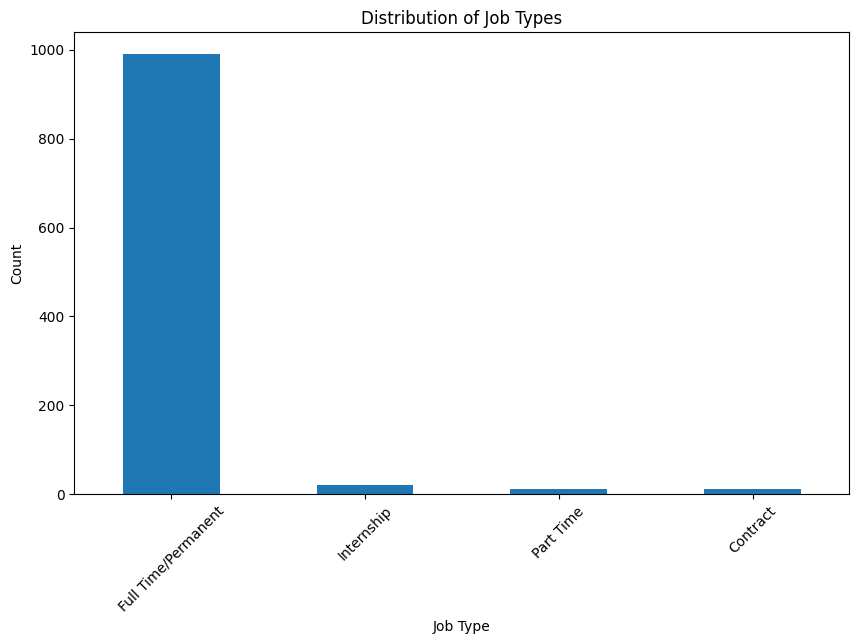

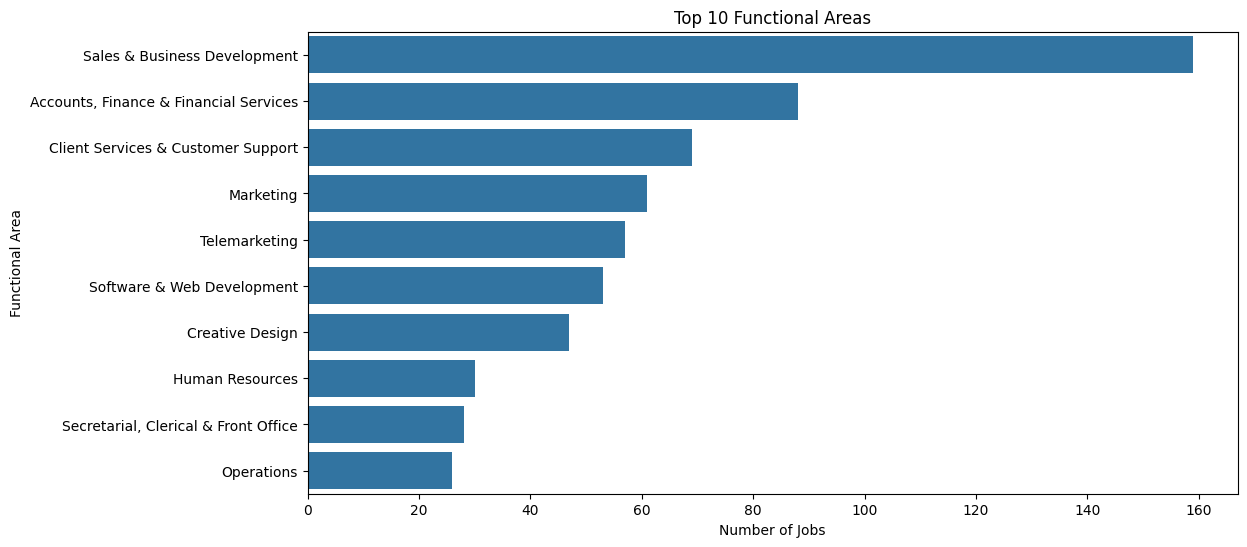

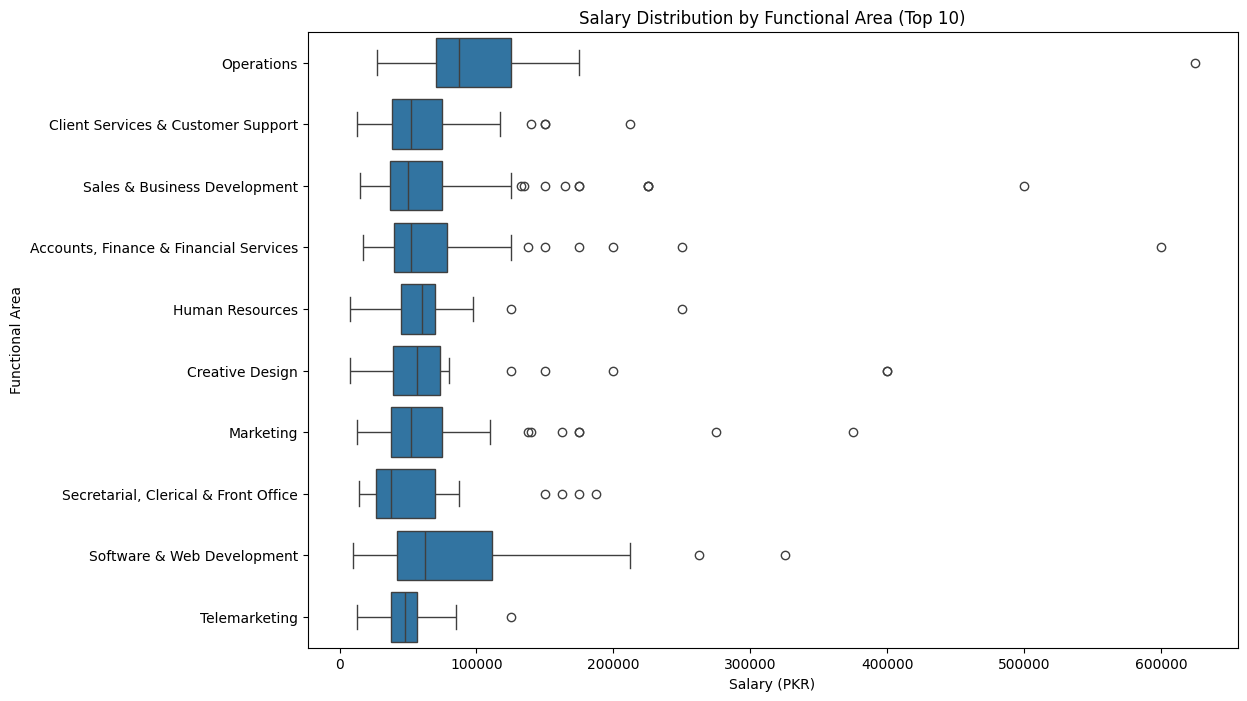

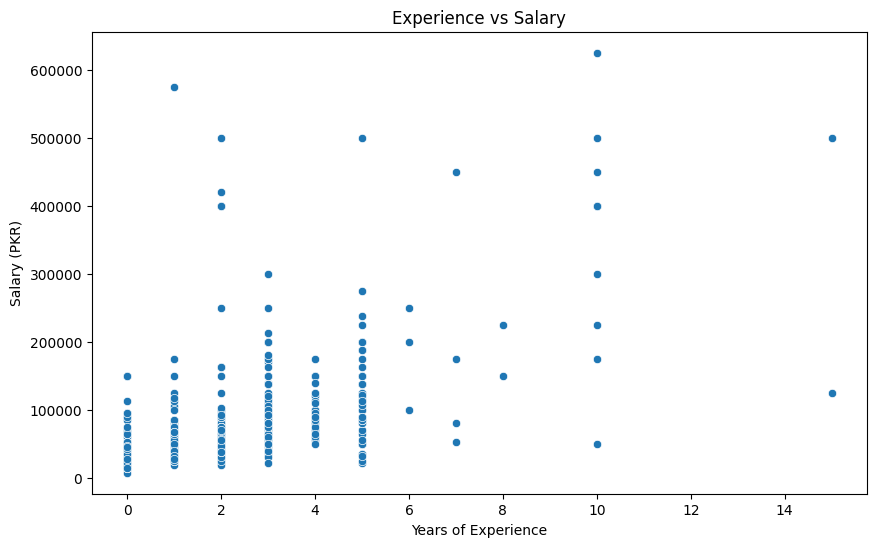

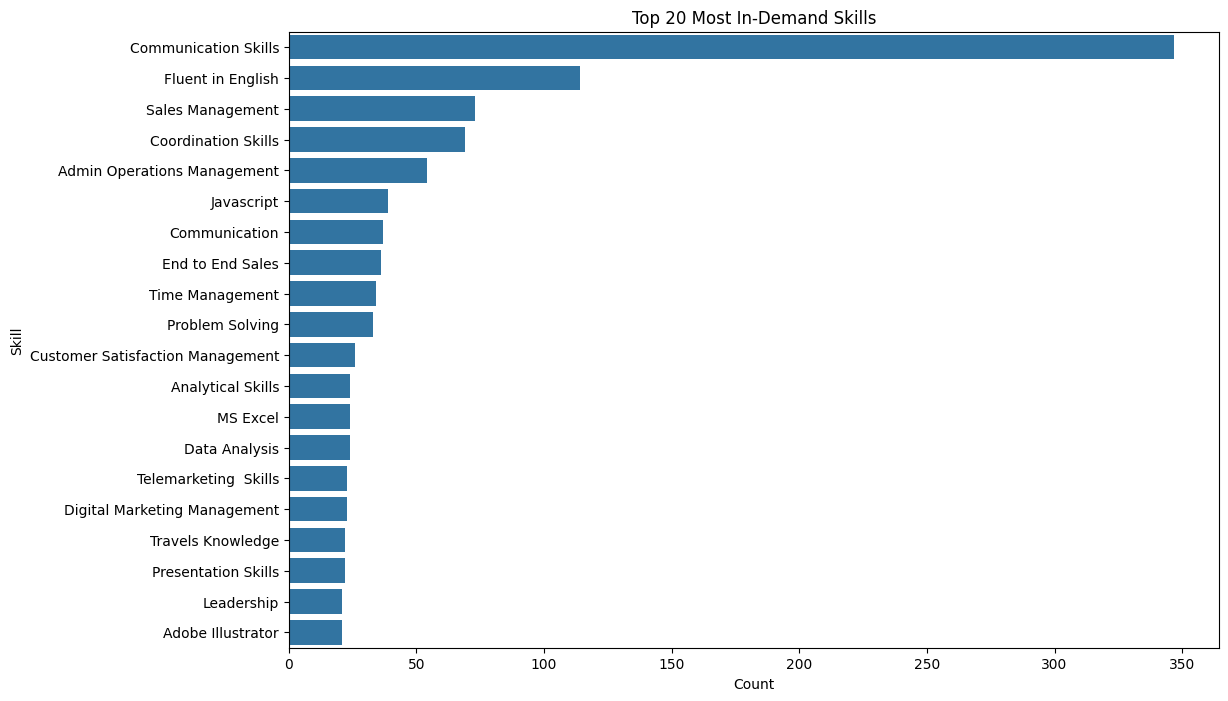

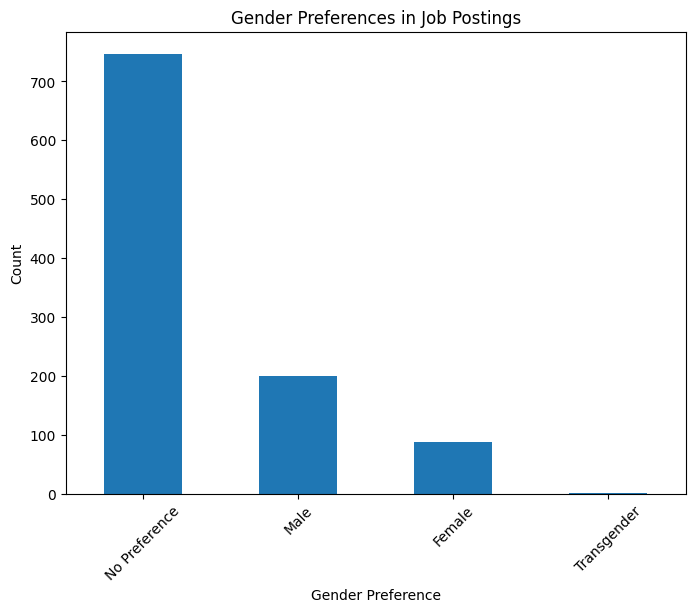


--- Salary Insights ---
Top-Paying Skills:
• Laravel: PKR 100,000
• Civil Engineering: PKR 250,000

Low-Paying Skills:
• Basic Sales: PKR 35,000


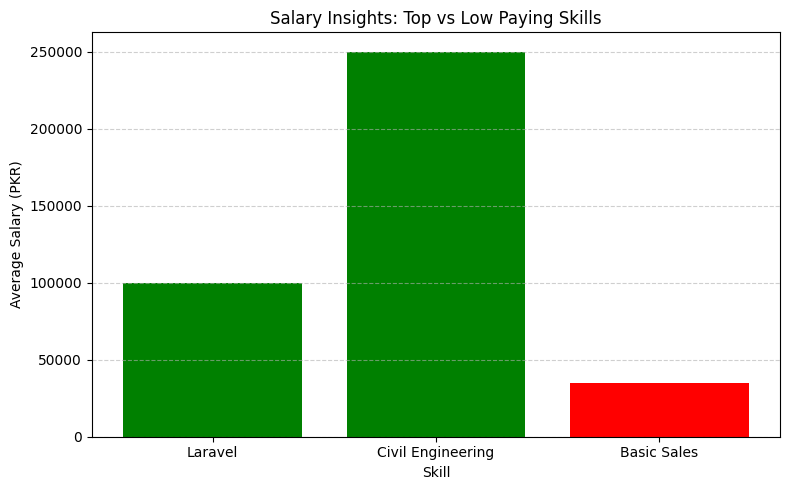

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Load the dataset
df = pd.read_csv('/content/RozeePK-Jobs-2024.csv')

# Initial inspection
print(df.head())
print(df.info())
print(df.describe())

# Data Cleaning

# 1. Handle missing values
df.replace('NA', np.nan, inplace=True)
df.replace('', np.nan, inplace=True)

# 2. Clean Salary column
def clean_salary(salary):
    if pd.isna(salary):
        return np.nan
    try:
        # Remove currency and range indicators
        salary = salary.replace('PKR.', '').replace('/Month', '').strip()
        if '-' in salary:
            low, high = salary.split('-')
            return (float(low.strip().replace(',', '')) + float(high.strip().replace(',', ''))) / 2
        else:
            return float(salary.strip().replace(',', ''))
    except:
        return np.nan

df['Salary'] = df['Salary'].apply(clean_salary)

# 3. Clean Experience column
def clean_experience(exp):
    if pd.isna(exp):
        return np.nan
    try:
        if 'Years' in exp:
            return float(exp.split('Years')[0].strip())
        elif 'Year' in exp:
            return float(exp.split('Year')[0].strip())
        elif 'Less than 1 Year' in exp:
            return 0.5
        elif 'Fresh' in exp:
            return 0
        else:
            return np.nan
    except:
        return np.nan

df['Minimum Experience'] = df['Minimum Experience'].apply(clean_experience)

# 4. Clean Job Location - extract primary city
def extract_primary_city(location):
    if pd.isna(location):
        return np.nan
    primary = location.split(',')[0].strip()
    return ' '.join(primary.split())

df['Primary City'] = df['Job Location'].apply(extract_primary_city)

# 5. Clean Skills - split into lists
df['Skills List'] = df['Skills'].str.split(', ')

# 6. Drop completely empty rows
df.dropna(how='all', inplace=True)

# Analysis and Visualization

# 1. Salary distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['Salary'].dropna(), bins=30, kde=True)
plt.title('Salary Distribution in PKR/month')
plt.xlabel('Salary (PKR)')
plt.ylabel('Count')
plt.show()

# 2. Top cities with most jobs
top_cities = df['Primary City'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title('Top 10 Cities by Job Count')
plt.xlabel('Number of Jobs')
plt.ylabel('City')
plt.show()

# 3. Job Type distribution
plt.figure(figsize=(10, 6))
df['Job Type'].value_counts().plot(kind='bar')
plt.title('Distribution of Job Types')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 4. Most common functional areas
top_areas = df['Functional Area'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_areas.values, y=top_areas.index)
plt.title('Top 10 Functional Areas')
plt.xlabel('Number of Jobs')
plt.ylabel('Functional Area')
plt.show()

# 5. Salary by Functional Area (top 10)
plt.figure(figsize=(12, 8))
top_areas_list = top_areas.index.tolist()
sns.boxplot(data=df[df['Functional Area'].isin(top_areas_list)],
            x='Salary', y='Functional Area')
plt.title('Salary Distribution by Functional Area (Top 10)')
plt.xlabel('Salary (PKR)')
plt.ylabel('Functional Area')
plt.show()

# 6. Experience vs Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Minimum Experience', y='Salary')
plt.title('Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary (PKR)')
plt.show()

# 7. Most in-demand skills (top 20)
all_skills = [skill for sublist in df['Skills List'].dropna() for skill in sublist]
skill_counts = Counter(all_skills).most_common(20)

skills, counts = zip(*skill_counts)
plt.figure(figsize=(12, 8))
sns.barplot(x=list(counts), y=list(skills))
plt.title('Top 20 Most In-Demand Skills')
plt.xlabel('Count')
plt.ylabel('Skill')
plt.show()

# 8. Gender preferences
plt.figure(figsize=(8, 6))
df['Gender'].value_counts().plot(kind='bar')
plt.title('Gender Preferences in Job Postings')
plt.xlabel('Gender Preference')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 9. Salary Insights – Top-Paying vs Low-Paying Skills
salary_insights = {
    'Laravel': 100000,
    'Civil Engineering': 250000,
    'Basic Sales': 35000  # avg between 30k–40k
}

# Categorizing top- and low-paying skills
top_paying = {k: v for k, v in salary_insights.items() if v >= 100000}
low_paying = {k: v for k, v in salary_insights.items() if v < 100000}

# Console output
print("\n--- Salary Insights ---")
print("Top-Paying Skills:")
for skill, salary in top_paying.items():
    print(f"• {skill}: PKR {salary:,}")

print("\nLow-Paying Skills:")
for skill, salary in low_paying.items():
    print(f"• {skill}: PKR {salary:,}")

# Visualize salary insights
plt.figure(figsize=(8, 5))
plt.bar(salary_insights.keys(), salary_insights.values(), color=['green', 'green', 'red'])
plt.title('Salary Insights: Top vs Low Paying Skills')
plt.ylabel('Average Salary (PKR)')
plt.xlabel('Skill')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [4]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport

# Load the dataset
df = pd.read_csv('/content/RozeePK-Jobs-2024.csv')

# Data cleaning steps
df.replace('NA', np.nan, inplace=True)
df.replace('', np.nan, inplace=True)

def clean_salary(salary):
    if pd.isna(salary):
        return np.nan
    try:
        salary = salary.replace('PKR.', '').replace('/Month', '').strip()
        if '-' in salary:
            low, high = salary.split('-')
            return (float(low.strip().replace(',', '')) + float(high.strip().replace(',', ''))) / 2
        else:
            return float(salary.strip().replace(',', ''))
    except:
        return np.nan

df['Salary'] = df['Salary'].apply(clean_salary)

def clean_experience(exp):
    if pd.isna(exp):
        return np.nan
    try:
        if 'Years' in exp:
            return float(exp.split('Years')[0].strip())
        elif 'Year' in exp:
            return float(exp.split('Year')[0].strip())
        elif 'Less than 1 Year' in exp:
            return 0.5
        elif 'Fresh' in exp:
            return 0
        else:
            return np.nan
    except:
        return np.nan

df['Minimum Experience'] = df['Minimum Experience'].apply(clean_experience)

def extract_primary_city(location):
    if pd.isna(location):
        return np.nan
    primary = location.split(',')[0].strip()
    primary = ' '.join(primary.split())
    return primary

df['Primary City'] = df['Job Location'].apply(extract_primary_city)
df['Skills List'] = df['Skills'].str.split(', ')
df.dropna(how='all', inplace=True)

# Generate the profile report (removed dark_mode parameter)
profile = ProfileReport(
    df,
    title="RozeePK Jobs 2024 Profiling Report",
    explorative=True,
    correlations={
        "pearson": {"calculate": True},
        "spearman": {"calculate": True},
        "kendall": {"calculate": True},
        "phi_k": {"calculate": True},
        "cramers": {"calculate": True}
    }
)

# Save the report to an HTML file
profile.to_file("RozeePK_Jobs_Profile_Report.html")

# Optional: To display in notebook
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 14/14 [00:00<00:00, 25.95it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd

# Load data
df = pd.read_csv("/content/RozeePK-Jobs-2024.csv")

# Drop rows with missing essential values
df_model = df.dropna(subset=['Functional Area', 'Skills', 'Minimum Education', 'Minimum Experience'])
df_model['Career Level'] = df_model['Career Level'].fillna('Unknown')
df_model['Job Type'] = df_model['Job Type'].fillna('Unknown')

# Combine features into one string column
df_model['Combined Features'] = (
    df_model['Skills'] + " " +
    df_model['Minimum Education'] + " " +
    df_model['Minimum Experience'] + " " +
    df_model['Career Level'] + " " +
    df_model['Job Type']
)

# Text vectorization
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df_model['Combined Features']).toarray()

# Label encoding for Functional Area
le = LabelEncoder()
y = le.fit_transform(df_model['Functional Area'])

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Get actual class names used in y_test
used_labels = sorted(list(set(y_test)))
used_class_names = le.inverse_transform(used_labels)

# Evaluate
print(classification_report(y_test, y_pred, labels=used_labels, target_names=used_class_names))


<ipython-input-5-5d8f0b316f38>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['Career Level'] = df_model['Career Level'].fillna('Unknown')
<ipython-input-5-5d8f0b316f38>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['Job Type'] = df_model['Job Type'].fillna('Unknown')
<ipython-input-5-5d8f0b316f38>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

                                            precision    recall  f1-score   support

    Accounts, Finance & Financial Services       0.73      0.67      0.70        12
                            Administration       0.67      0.50      0.57         4
                               Advertising       0.00      0.00      0.00         1
                 Architects & Construction       1.00      0.33      0.50         3
        Client Services & Customer Support       0.67      0.46      0.55        13
                       Computer Networking       0.33      0.50      0.40         2
                           Creative Design       1.00      0.83      0.91         6
                                Data Entry       0.00      0.00      0.00         1
                  Distribution & Logistics       1.00      1.00      1.00         1
                               Engineering       0.33      0.50      0.40         2
                         Health & Medicine       1.00      0.60      0.75  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
df = pd.read_csv("/content/RozeePK-Jobs-2024.csv")

# Drop missing values in critical fields
df = df.dropna(subset=['Skills', 'Functional Area'])

# Use only Skills as input, Functional Area as output
X_raw = df['Skills']
y_raw = df['Functional Area']

# Encode target labels
le = LabelEncoder()
y = le.fit_transform(y_raw)

# Vectorize the Skills text
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(X_raw)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train classification model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
#print("\nClassification Report:\n")
#print(classification_report(y_test, y_pred, target_names=le.classes_))

#  Function to predict job market for a new course (skills)
def predict_job_market_from_skills(skills_string):
    vec = vectorizer.transform([skills_string])
    pred_label = model.predict(vec)
    return le.inverse_transform(pred_label)[0]

#  Example: Predict for new course skill sets
example_courses = [
    "Machine Learning Python Data Analysis",
    "Search Engine Optimization Content Marketing",
    "Recruitment Talent Acquisition HR Management",
    "Civil Engineering AutoCAD Project Management",
    "Auditing Financial Reporting Accounting"
]

predictions = {skills: predict_job_market_from_skills(skills) for skills in example_courses}
print("\nExample Predictions:\n")
for k, v in predictions.items():
    print(f"{k} ➤ {v}")


Accuracy: 0.6111111111111112

Example Predictions:

Machine Learning Python Data Analysis ➤ Data Entry
Search Engine Optimization Content Marketing ➤ Marketing
Recruitment Talent Acquisition HR Management ➤ Human Resources
Civil Engineering AutoCAD Project Management ➤ Architects & Construction
Auditing Financial Reporting Accounting ➤ Accounts, Finance & Financial Services



Top 20 In-Demand Skills:

communication skills ➤ 332
fluent in english ➤ 114
sales management ➤ 71
coordination skills ➤ 69
admin operations management ➤ 50
end to end sales ➤ 36
customer satisfaction management ➤ 26
javascript ➤ 25
ms excel ➤ 24
telemarketing  skills ➤ 23
travels knowledge ➤ 22
digital marketing management ➤ 22
presentation skills ➤ 22
multitasking skills ➤ 20
analytical skills ➤ 19
adobe illustrator ➤ 19
financial accounting ➤ 18
accounts software command ➤ 17
administrative management ➤ 17
email list management ➤ 16


<ipython-input-7-11fe2855c138>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(skills), palette='viridis')


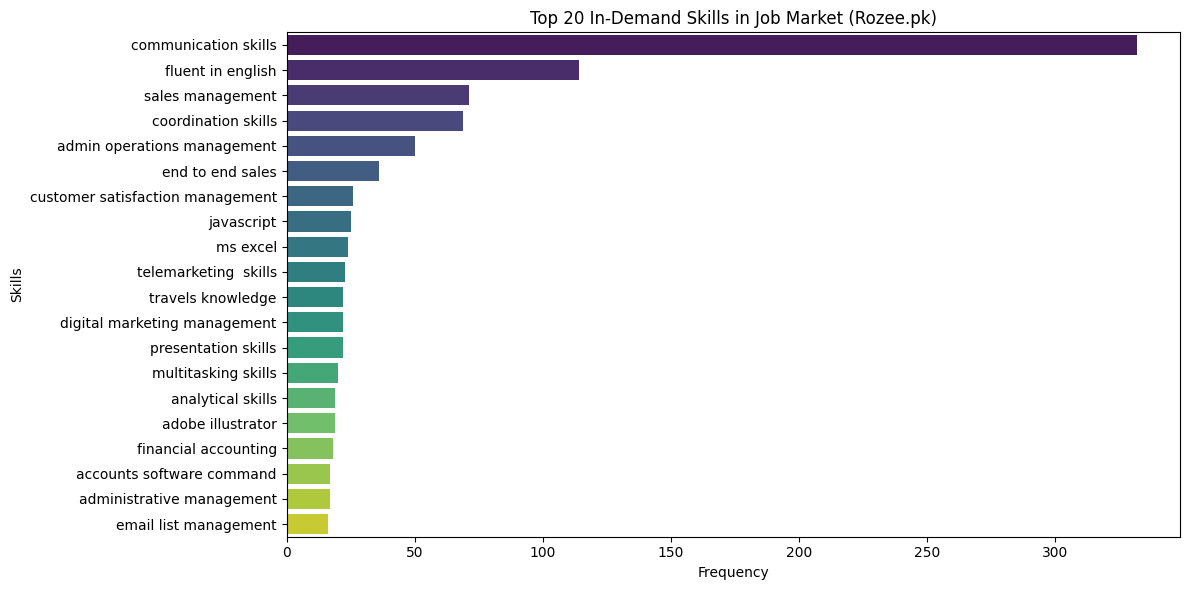

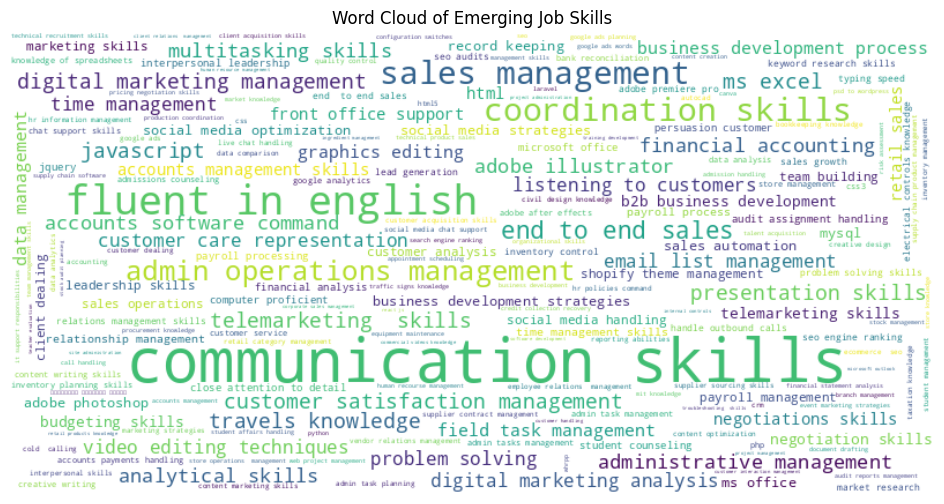

In [7]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# Clean and flatten the skills into a word list
skill_words = []
for skills in df['Skills'].dropna():
    for word in skills.lower().split(','):
        word = word.strip()
        if len(word) > 1:
            skill_words.append(word)

# Count frequency of each skill
skill_counts = Counter(skill_words)
top_skills = skill_counts.most_common(20)

# Show top skills
print("\nTop 20 In-Demand Skills:\n")
for skill, count in top_skills:
    print(f"{skill} ➤ {count}")

# Visualize with bar plot
skills, counts = zip(*top_skills)
plt.figure(figsize=(12, 6))
sns.barplot(x=list(counts), y=list(skills), palette='viridis')
plt.title("Top 20 In-Demand Skills in Job Market (Rozee.pk)")
plt.xlabel("Frequency")
plt.ylabel("Skills")
plt.tight_layout()
plt.show()

# Optional: Word Cloud
wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(skill_counts)
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Emerging Job Skills")
plt.show()
